# MLP

In [1]:
from dotenv import load_dotenv
import os
import sys
load_dotenv()
# Mac Modified! add PYTHONPATH variable to .env file and set to root project directory
sys.path.insert(0, os.getenv("PYTHONPATH"))

## 0. Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Mac Modified! import tensorflow & keras independently
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, optimizers, utils, datasets
from notebooks.utils import display

2023-09-09 18:34:44.415700: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 1. Prepare the data

### Example 2-1. Processing the CIFAR-10 dataset

In [3]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()

Parameters

In [4]:
NUM_CLASSES = 10

In [5]:
# Normalize the dataset
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') /255.0

In [6]:
# One Hot Encoding the labels: convert 1 column label to 10 column labels
y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [7]:
# Example 2-1. green channel (1) value of the pixel at (12, 13) of image 54
x_train[54, 12, 13, 1]

0.36862746

## 2. Build the Model
 Example 2-4. Building our MLP using functional API

In [8]:
input_layer = layers.Input((32, 32, 3))

x = layers.Flatten()(input_layer)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)

output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)

2023-09-09 18:35:17.623747: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: AMD Radeon Pro 5300M
2023-09-09 18:35:17.623781: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-09-09 18:35:17.623789: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 1.99 GB
2023-09-09 18:35:17.623848: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-09 18:35:17.623889: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


_**Note**:  these parameters in above summary output, are the total number of inputs to  all the neuron units in the hidden layers._

## 3. Train the model

Experiment: training model with GPU (tensorflow-metal manages the load to the GPU)

In [10]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [11]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10


2023-09-09 18:35:57.149886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-09 18:35:57.203808: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


1563/1563 [==============================] - 51s 31ms/step - loss: 2.0791 - accuracy: 0.2726
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 2.0943 - accuracy: 0.2954
Epoch 3/10
1563/1563 [==============================] - 46s 29ms/step - loss: 2.4144 - accuracy: 0.2779
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 2.9037 - accuracy: 0.2592
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 3.4049 - accuracy: 0.2492
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 4.0105 - accuracy: 0.2435
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 4.8345 - accuracy: 0.2343
Epoch 8/10
1563/1563 [==============================] - 40s 26ms/step - loss: 5.6873 - accuracy: 0.2278
Epoch 9/10
1563/1563 [==============================] - 39s 25ms/step - loss: 6.7306 - accuracy: 0.2239
Epoch 10/10
1563/1563 [==============================] - 39s 25ms/step - lo

Experiment: with CPU

In [12]:
with tf.device('/CPU'):
    input_layer2 = layers.Input((32, 32, 3))

    x2 = layers.Flatten()(input_layer2)
    x2 = layers.Dense(200, activation="relu")(x2)
    x2 = layers.Dense(150, activation="relu")(x2)

    output_layer2 = layers.Dense(NUM_CLASSES, activation="softmax")(x2)

    model2 = models.Model(input_layer2, output_layer2)

    opt2 = optimizers.Adam(learning_rate=0.0005)
    model2.compile(
        loss="categorical_crossentropy", optimizer=opt2, metrics=["accuracy"]
    )
    model2.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)
    

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8462 - accuracy: 0.3349
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6604 - accuracy: 0.4071
Epoch 3/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5874 - accuracy: 0.4339
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5364 - accuracy: 0.4507
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5025 - accuracy: 0.4663
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4711 - accuracy: 0.4760
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4467 - accuracy: 0.4834
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4225 - accuracy: 0.4914
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4030 - accuracy: 0.4997
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.

Experiment: with GPU on batch size = 100

In [14]:
input_layer2 = None
x2 = None
output_layer2 = None
opt2 = None
model2 = None

with tf.device('/GPU'):
    input_layer2 = layers.Input((32, 32, 3))

    x2 = layers.Flatten()(input_layer2)
    x2 = layers.Dense(200, activation="relu")(x2)
    x2 = layers.Dense(150, activation="relu")(x2)

    output_layer2 = layers.Dense(NUM_CLASSES, activation="softmax")(x2)

    model2 = models.Model(input_layer2, output_layer2)

    opt_Adam = optimizers.Adam(learning_rate=0.0005)
    model2.compile(
        loss="categorical_crossentropy", optimizer=opt_Adam, metrics=["accuracy"]
    )
    model2.fit(x_train, y_train, batch_size=100, epochs=10, shuffle=True)

Epoch 1/10


2023-09-09 19:01:00.205741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-09 19:01:00.247463: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


500/500 [==============================] - 12s 23ms/step - loss: 2.0910 - accuracy: 0.2615
Epoch 2/10
500/500 [==============================] - 12s 23ms/step - loss: 1.9427 - accuracy: 0.3186
Epoch 3/10
500/500 [==============================] - 12s 24ms/step - loss: 1.9385 - accuracy: 0.3236
Epoch 4/10
500/500 [==============================] - 11s 23ms/step - loss: 1.9440 - accuracy: 0.3245
Epoch 5/10
500/500 [==============================] - 11s 22ms/step - loss: 2.0114 - accuracy: 0.3163
Epoch 6/10
500/500 [==============================] - 11s 23ms/step - loss: 2.0621 - accuracy: 0.3122
Epoch 7/10
500/500 [==============================] - 12s 23ms/step - loss: 2.1450 - accuracy: 0.3035
Epoch 8/10
500/500 [==============================] - 12s 23ms/step - loss: 2.2527 - accuracy: 0.2949
Epoch 9/10
500/500 [==============================] - 12s 23ms/step - loss: 2.2702 - accuracy: 0.2981
Epoch 10/10
500/500 [==============================] - 11s 23ms/step - loss: 2.4230 - accurac

Experiment: with CPU on batch size = 100

In [15]:
input_layer2 = None
x2 = None
output_layer2 = None
opt2 = None
model2 = None

with tf.device('/CPU'):
    input_layer2 = layers.Input((32, 32, 3))

    x2 = layers.Flatten()(input_layer2)
    x2 = layers.Dense(200, activation="relu")(x2)
    x2 = layers.Dense(150, activation="relu")(x2)

    output_layer2 = layers.Dense(NUM_CLASSES, activation="softmax")(x2)

    model2 = models.Model(input_layer2, output_layer2)

    opt_Adam = optimizers.Adam(learning_rate=0.0005)
    model2.compile(
        loss="categorical_crossentropy", optimizer=opt_Adam, metrics=["accuracy"]
    )
    model2.fit(x_train, y_train, batch_size=100, epochs=10, shuffle=True)

Epoch 1/10
500/500 [==============================] - 5s 8ms/step - loss: 1.8562 - accuracy: 0.3346
Epoch 2/10
500/500 [==============================] - 4s 8ms/step - loss: 1.6738 - accuracy: 0.4011
Epoch 3/10
500/500 [==============================] - 4s 8ms/step - loss: 1.5945 - accuracy: 0.4342
Epoch 4/10
500/500 [==============================] - 4s 8ms/step - loss: 1.5394 - accuracy: 0.4546
Epoch 5/10
500/500 [==============================] - 4s 8ms/step - loss: 1.5007 - accuracy: 0.4679
Epoch 6/10
500/500 [==============================] - 4s 8ms/step - loss: 1.4689 - accuracy: 0.4774
Epoch 7/10
500/500 [==============================] - 4s 9ms/step - loss: 1.4337 - accuracy: 0.4922
Epoch 8/10
500/500 [==============================] - 4s 8ms/step - loss: 1.4080 - accuracy: 0.5004
Epoch 9/10
500/500 [==============================] - 4s 8ms/step - loss: 1.3887 - accuracy: 0.5074
Epoch 10/10
500/500 [==============================] - 4s 8ms/step - loss: 1.3622 - accuracy: 0.5164

Conclusion: GPU works well when batch size is more.

## Evaluating the model

In [16]:
model.evaluate(x_test, y_test)

  1/313 [..............................] - ETA: 1:34 - loss: 6.4462 - accuracy: 0.1875

2023-09-09 21:06:59.366878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 6s 18ms/step - loss: 7.9958 - accuracy: 0.2251


[7.99583101272583, 0.22509999573230743]

Predition with the model

In [19]:
CLASSES = np.array(['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]  # axis=-1 : converts 10 column output to single column
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 2s 5ms/step


Display the predictions

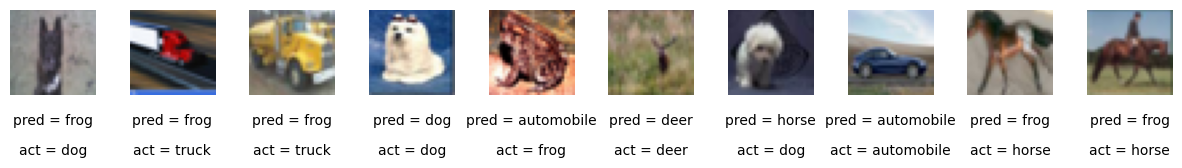

In [21]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
